# A Simulation Study

Ava Santos-Volpe  
2025-10-26

# Maternal investment in frogs

For this project, I will be looking at the frog dataset from
[OpenIntro](https://www.openintro.org/data/index.php?data=frog). This
data set is from a study which was trying to understand whether maternal
investment changes at varying altitudes on the Tibetan Plateau. The
study sought to determine whether reproducing females allocated their
energy to egg productions of size or number, which can both influence
fitness.

From February to April 2013, the study team studied various populations
of frog who live between 2035 to 3494 m above sea level in the eastern
Tibetan Plateau. They located breeding ponds at various altitudes, and
at each one, obtained a small sample of freshly laid egg clutches. They
counted the number of eggs and weighed the clutch to determine egg
weight, and approximated egg size from photographs. The groups I will be
looking at will be those above 2,764.5m and those below. I will compare
clutch size (estimated number of eggs in a clutch) to generalize about
the whole population of this frog species (Rana kukunoris) on the
Tibetan Plateau. Original data from [Chen et
al. (2013)](https://pubmed.ncbi.nlm.nih.gov/24200096/).

Reference: Chen, W., Tang, Z. H., Fan, X. G., Wang, Y., & Pike, D. A.
(2013). Maternal investment increases with altitude in a frog on the
Tibetan Plateau. Journal of Evolutionary Biology, 26(12), 2710–2715.
https://doi.org/10.1111/jeb.12271

Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

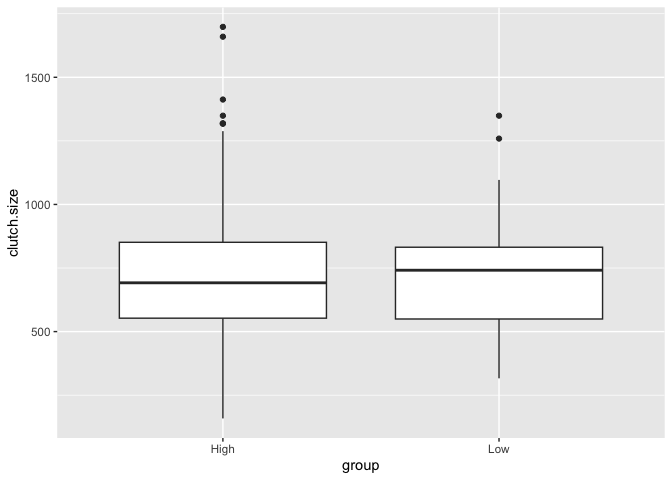

# A tibble: 1 × 2
  avg_diff med_diff
     <dbl>    <dbl>
1     13.7     49.5

In [ ]:
#| label: frog_viz

library(openintro)

This plot is a visualization of the original data. It shows some
differences between the “high” and “low” altitude groups, with a couple
of outliers. The median for the “high” group is 691.83, while the median
for the “low” group is 741.31. The average for the “high” group is
719.69, while the average for the “low” group is 733.42.

The following simulation function takes the original data and permutes
the clutch sizes among groups. Next, it calculates the difference in
means/medians for the original and permuted data. Then, it compares
them. Lastly, I mapped my data so that the function would be repeated
many times to build a distribution of what differences we would expect
by chance.

# A tibble: 10 × 5
   obs_avg_diff obs_med_diff perm_avg_diff perm_med_diff   rep
          <dbl>        <dbl>         <dbl>         <dbl> <int>
 1         13.7         49.5         45.8           8.06     1
 2         13.7         49.5          5.80          8.06     2
 3         13.7         49.5         33.8          49.5      3
 4         13.7         49.5          2.16        -47.3      4
 5         13.7         49.5         15.2          49.5      5
 6         13.7         49.5        -25.9          16.1      6
 7         13.7         49.5         30.1           8.06     7
 8         13.7         49.5        -28.1         -16.1      8
 9         13.7         49.5         36.6         102.       9
10         13.7         49.5         34.3          84.4     10

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

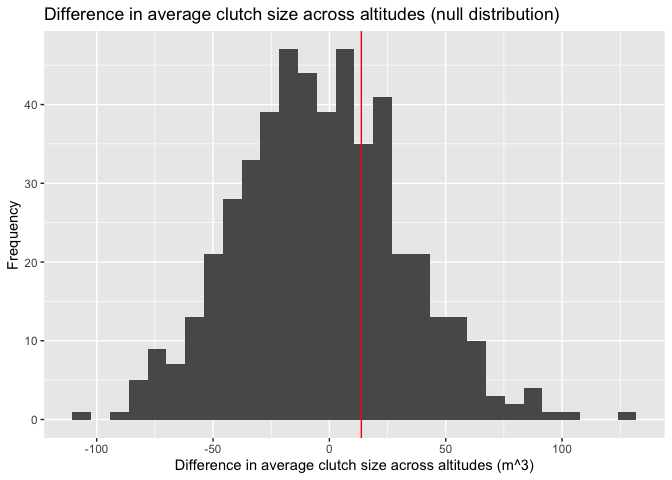

In [ ]:
#| label: frog_null

# generate null sampling distribution
perm_data <- function(rep, data) {
  data |>
    select(group, clutch.size) |>
    mutate(clutch_perm = sample(clutch.size, replace = FALSE)) |>
    group_by(group) |>
    summarize(obs_avg = mean(clutch.size),
              obs_med = median(clutch.size),
              perm_avg = mean(clutch_perm),
              perm_med = median(clutch_perm)) |>
    summarize(obs_avg_diff = diff(obs_avg),
              obs_med_diff = diff(obs_med),
              perm_avg_diff = diff(perm_avg),
              perm_med_diff = diff(perm_med),
              rep = rep)
}

purrr::map(c(1:10), perm_data, data = frog2) |>
  list_rbind()

This plot is the visualization of the null sampling distribution
(median). The distribution of differences we would expect if altitude
did not affect clutch size.

In [ ]:
#| label: p_val

# calculate p-value
perm_stats |>
  summarize(p_value_avg = mean(perm_avg_diff > obs_avg_diff),
            p_value_med = mean(perm_med_diff > obs_med_diff))

# A tibble: 1 × 2
  p_value_avg p_value_med
        <dbl>       <dbl>
1       0.306       0.116

From these tests, the observed differences seem to be in line with the
distribution of differences in the null sampling distribution. There is
no evidence to reject the null hypothesis: the average/median clutch
size of Rana kukunoris does not differ across elevations. So, altitude
does not seem to have an effect on clutch size in Rana kukunoris.